In [1]:
import scipy.linalg as la
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from main_grape.Grape import Grape
%pylab inline

from IPython import display
import h5py

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Defining time scales
total_time = 5.0
steps = 500

# Choose optimizing State transfer or Unitary gate
state_transfer = False

#Defining H0
qubit_state_num = 4
alpha = 0.224574
freq_ge = 3.9225#GHz
ens = np.array([ 2*np.pi*ii*(freq_ge - 0.5*(ii-1)*alpha) for ii in np.arange(qubit_state_num)])
Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag(ens)
H0 = H_q 
       

#Defining Concerned states (starting states)
if state_transfer:
    psi0=[0]
else:
    psi0 = [0,1]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1,2]
states_draw_names = ['g','e','f']

#Defining U (Target)

Ut_c = la.expm((0-1j)*total_time*H0)
Ct_c = Ut_c.copy()
Ct_c[1,0] = 1
Ct_c[0,1] = 1
Ct_c[0,0] = 0
Ct_c[1,1] = 0
U = Ct_c

#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num)
U0= q_identity

#Defining control Hs
XI = Q_x
ZI = Q_z
Hops = [XI,ZI]
ops_max_amp = [2.0,2.0]
Hnames =['x','z']

#Defining convergence parameters
max_iterations = 100
decay = max_iterations/2
convergence = {'rate':0.1, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-4,'learning_rate_decay':decay}

u0 = None

#Definining reg coeffs

reg_coeffs = {'amplitude':0.1,'dwdt':0.001,'forbidden':100,'states_forbidden_list':[2,3]}
# reg_coeffs = {'bandpass':0.1,'band':[3,5],'forbidden':100,'states_forbidden_list':[2,3]}

In [3]:
# set data path, the folder must be an existing directory
data_path = '/home/nelson/Simulations/GRAPE-Data/transmon_pi'

data saved at: /home/nelson/Simulations/GRAPE-Data/transmon_pi/00177_transmon_pi.h5


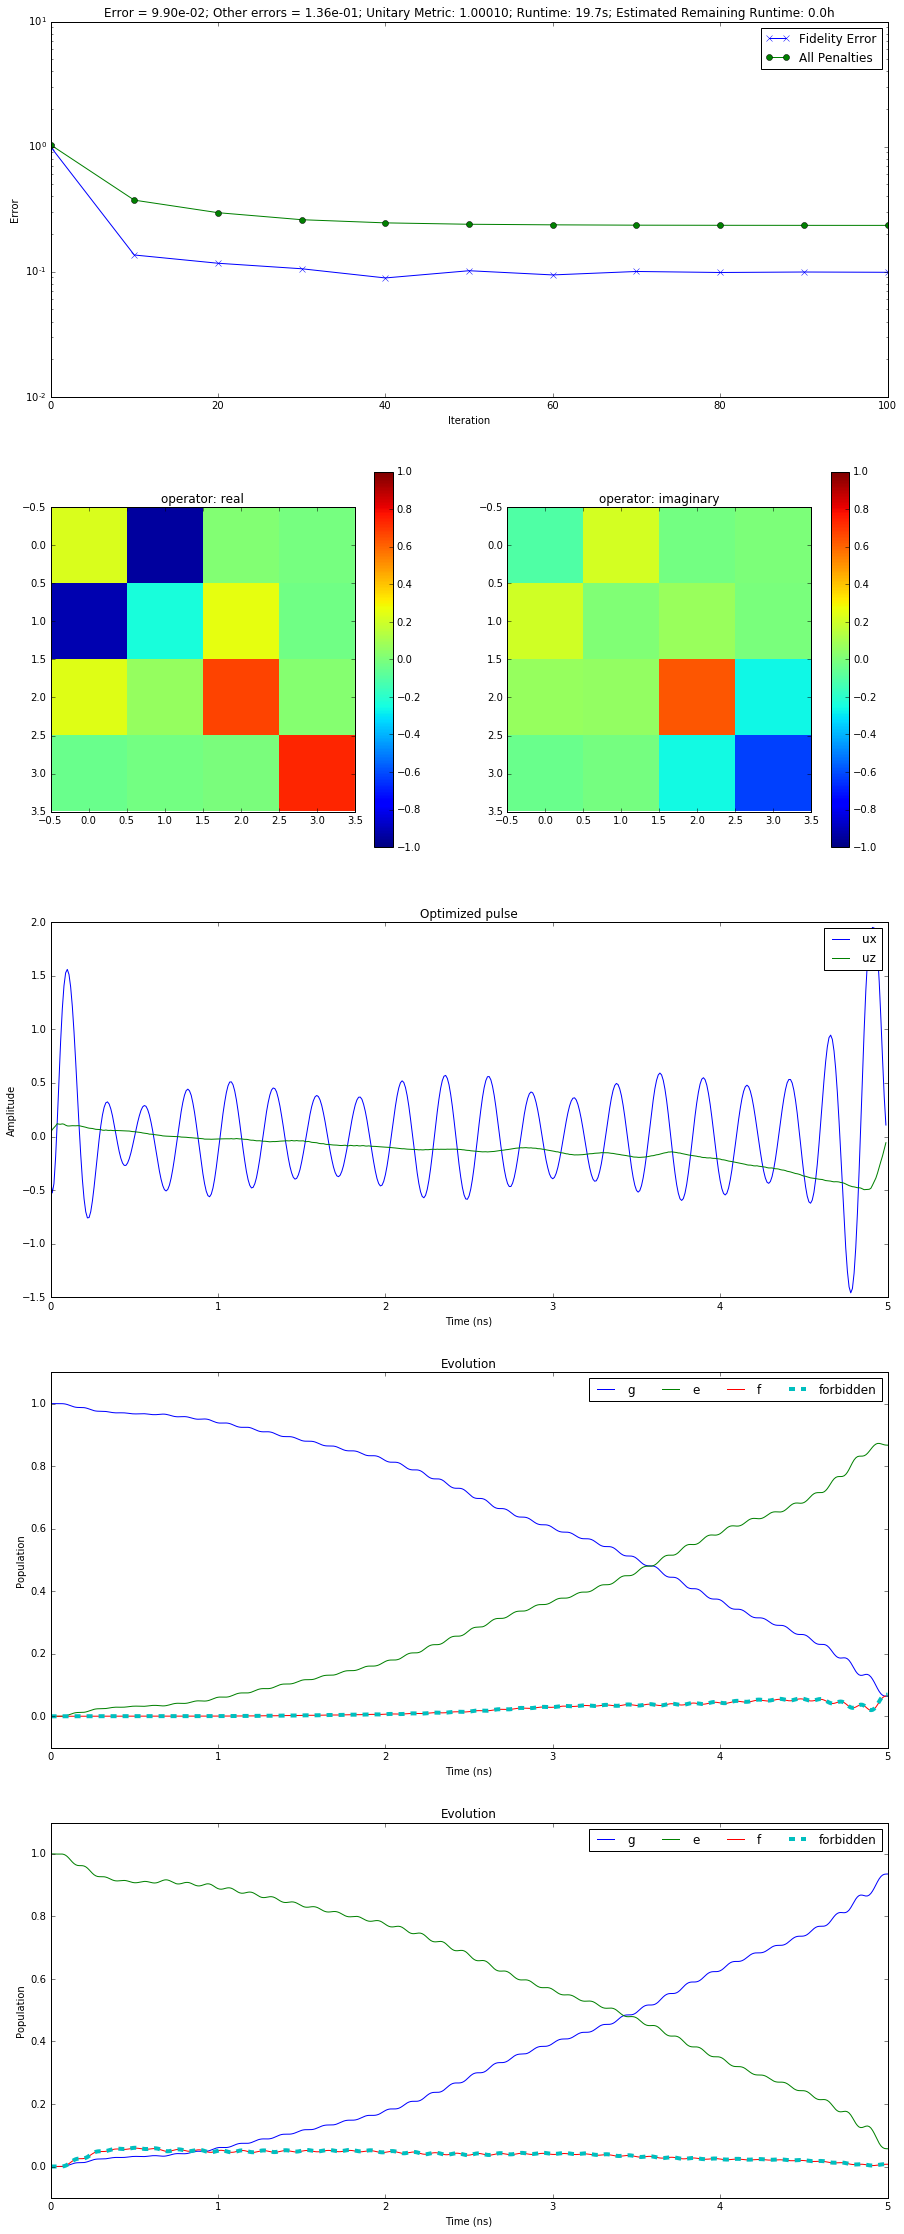

In [4]:
uks,U_final = Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence, draw = [states_draw_list,states_draw_names],show_plots = True, 
 unitary_error = 1e-8, method = 'Adam',maxA=ops_max_amp,initial_guess=u0,\
                    use_gpu=False,reg_coeffs=reg_coeffs, file_name='transmon_pi', 
                    data_path = data_path)
      